# OpenIntro Statistics - Chapter 2 : Summarizing Data (Résumer les données)
**Titanic Survival Analysis (Titanic dataset)**
>**Source**: *OpenIntro Statistics*(4th ed.)  
>**Core Principle**:*'Variable type determines analysis method'*<br>
[OpenIntro Ch 2 Theory summary](../references/openintro_ch2_summary.md)

In [28]:
# OpenIntro Ch 2: Summarizing Data — Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

#set visualization.
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
try:
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

# laot titanic dataset - df= pandas.dataframe
df = sns.load_dataset('titanic')
print("*"*70)
print("OpenIntro Statistics — Chapter 2: Summarizing Data")
print("*"*70)
print(f"• Dataset: Titanic passengers (n = {len(df)})")
print(f"• Numerical variables: age, fare, sibsp, parch")
print(f"• Categorical variables: sex, pclass, embarked, survived")
print("Display the first three lines")
display(df.head(3))

**********************************************************************
OpenIntro Statistics — Chapter 2: Summarizing Data
**********************************************************************
• Dataset: Titanic passengers (n = 891)
• Numerical variables: age, fare, sibsp, parch
• Categorical variables: sex, pclass, embarked, survived
Display the first three lines


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [29]:
# OpenIntro Ch 2.1: Measures of Center — Mean vs Median vs Mode
print("*"*70)
print("Step 1: Measures of Center (Mean vs Median vs Mode)")
print("*"*70)

variables = ['age', 'fare']
center_report = []

for var in variables:
    # calculate mean, median and mod.
    mean_val = df[var].mean()
    median_val = df[var].median()
    #when existe multiple mode,iloc[0]=first value.when column is empty, mode_val=NaN (np.nan=NaN)
    mode_val = df[var].mode().iloc[0] if not df[var].mode().empty else np.nan
    #right skew,left skew etc.
    skew_val = df[var].skew()
    #calculate total value missing.df['age'],df{'fare'}
    n_missing = df[var].isnull().sum()
    
    # Determine distribution pattern
    if skew_val > 0.5:
        shape = "Right-skewed"
        recommended = "Median (robust to skew)"
    elif skew_val < -0.5:
        shape = "Left-skewed"
        recommended = "Median (robust to skew)"
    else:
        shape = "Approximately symmetric"
        recommended = "Mean (efficient for symmetric)"
    
    center_report.append({
        'variable': var,
        'mean': f"{mean_val:.2f}",
        'median': f"{median_val:.2f}",

        #pd.notna(mode_val) is a pandas function that checks if a value is NOT NaN (Not a Number)
        #True=Not NaN return mode_val,False=Nan return 'N/A'
        'mode': f"{mode_val:.2f}" if pd.notna(mode_val) else "N/A",
        'skewness': f"{skew_val:.2f}",
        'shape': shape,
        'recommended': recommended,
        'missing': f"{n_missing} ({n_missing/len(df)*100:.1f}%)"
    })
    
    print(f"\n{var.upper()}:")
    print(f"  • Mean    = {mean_val:.2f}")
    print(f"  • Median  = {median_val:.2f}")
    print(f"  • Mode    = {mode_val:.2f}" if pd.notna(mode_val) else "  • Mode    = N/A")
    print(f"  • Skewness = {skew_val:.2f} → {shape}")
    print(f"  • OpenIntro Recommendation: {recommended}")
    print(f"  • Missing: {n_missing} values ({n_missing/len(df)*100:.1f}%)")

#create dataframe with a list, all the items in the list is a dictionary [{}].
center_df = pd.DataFrame(center_report)
print("\n" + "*"*70)
print("Center Measures Summary Table (OpenIntro Ch 2.1):")
print("*"*70)
#when index=True, output includes rownum
#when index=False, output doesnot includes rownum.
print(center_df.to_string(index=True))

**********************************************************************
Step 1: Measures of Center (Mean vs Median vs Mode)
**********************************************************************

AGE:
  • Mean    = 29.70
  • Median  = 28.00
  • Mode    = 24.00
  • Skewness = 0.39 → Approximately symmetric
  • OpenIntro Recommendation: Mean (efficient for symmetric)
  • Missing: 177 values (19.9%)

FARE:
  • Mean    = 32.20
  • Median  = 14.45
  • Mode    = 8.05
  • Skewness = 4.79 → Right-skewed
  • OpenIntro Recommendation: Median (robust to skew)
  • Missing: 0 values (0.0%)

**********************************************************************
Center Measures Summary Table (OpenIntro Ch 2.1):
**********************************************************************
  variable   mean median   mode skewness                    shape                     recommended      missing
0      age  29.70  28.00  24.00     0.39  Approximately symmetric  Mean (efficient for symmetric)  177 (19.9%)
1 

**********************************************************************
Step 2: Measures of Spread (Std Dev vs IQR) + Box Plots
**********************************************************************

SUCCESS: Box plots saved to C:\Users\Utilisateur\Data_Science_learn\titanic-statistical-analysis\notebooks\reports\figures\ch2_box_plots.png


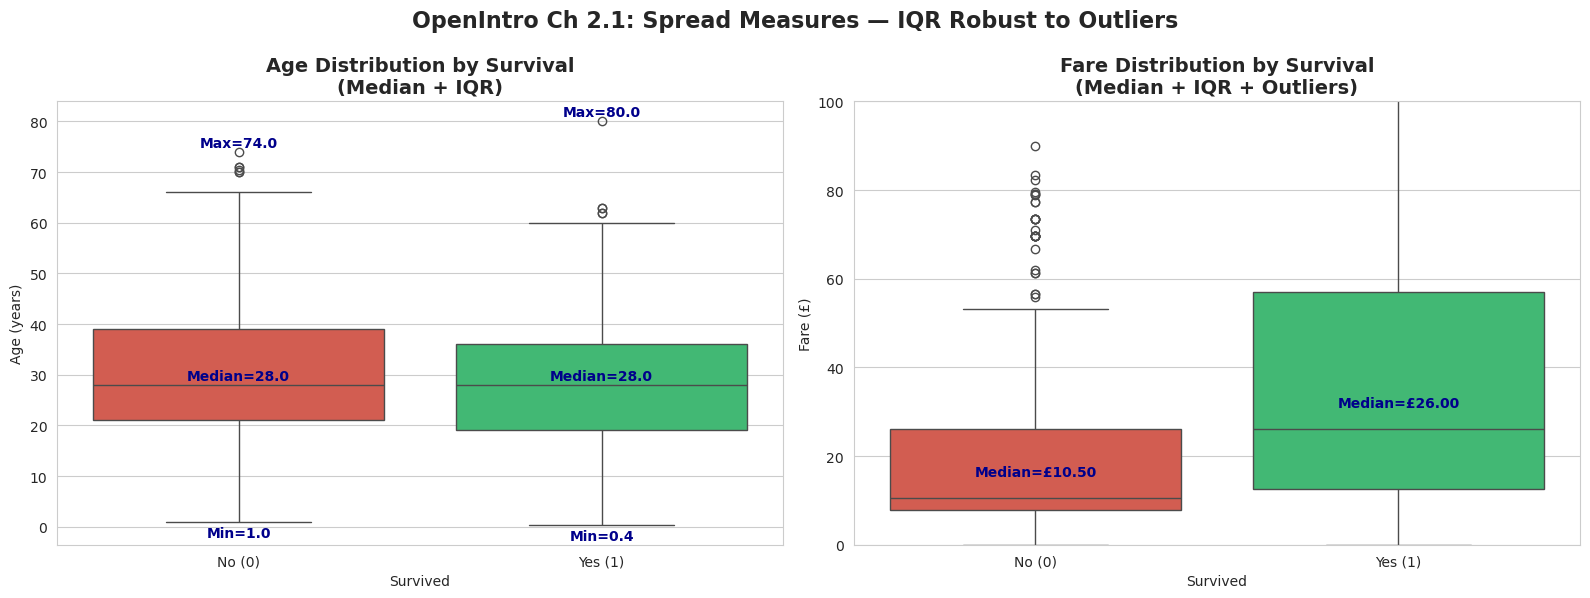


📊 Spread Measures Comparison:

AGE:
  • Std Dev = 14.53 (sensitive to outliers)
  • IQR     = 17.88 (robust to outliers)
  • Range   = [0.42, 80.00]

FARE:
  • Std Dev = 49.69 (sensitive to outliers)
  • IQR     = 23.09 (robust to outliers)
  • Range   = [0.00, 512.33]
  • Std Dev (£49.69) INFLATED by outliers (£512)
  • IQR (£23.09) better captures spread of middle 50%

OpenIntro Principle (Ch 2.1.3):
  • Std Dev: Use for SYMMETRIC distributions (efficient but not robust)
  • IQR: Use for SKEWED distributions or with outliers (robust but less efficient)


In [43]:
# OpenIntro Ch 2.2: Measures of Spread — Std Dev vs IQR
print("*"*70)
print("Step 2.1: Measures of Spread (Std Dev vs IQR) + Box Plots")
print("*"*70)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (a) Age box plot
sns.boxplot(
    data=df,
    x='survived',
    y='age',
    hue='survived', # hue = x
    palette=['#E74C3C', '#2ECC71'],
    ax=axes[0],
    legend=False
)
axes[0].xaxis.set_major_locator(FixedLocator([0, 1]))  # define scale 0 and 1, 0=no survived, 1=survived
axes[0].set_xticklabels(['No (0)', 'Yes (1)']) # No(0) for no survived, Yes(1)=survived.
axes[0].set_title('Age Distribution by Survival\n(Median + IQR)', fontsize=14, fontweight='bold')#show value of median and value of IQR.
axes[0].set_ylabel('Age (years)')
axes[0].set_xlabel('Survived')

# add median number.
for i, survived in enumerate([0, 1]):
    median_age = df[df['survived'] == survived]['age'].median()
    max_age = df[df['survived'] == survived]['age'].max()
    min_age = df[df['survived'] == survived]['age'].min()
    axes[0].text(i, max_age+1 , f'Max={max_age:.1f}', 
                ha='center', fontsize=10, fontweight='bold', color='darkblue')
    axes[0].text(i, min_age-3 , f'Min={min_age:.1f}', 
                ha='center', fontsize=10, fontweight='bold', color='darkblue')
    axes[0].text(i, median_age + 1, f'Median={median_age:.1f}', 
                ha='center', fontsize=10, fontweight='bold', color='darkblue')
    

# (b) Fare box plot (zoomed to show typical range)
sns.boxplot(
    data=df,
    x='survived',
    y='fare',
    hue='survived',  # Seaborn 0.14+ 兼容
    palette=['#E74C3C', '#2ECC71'],
    ax=axes[1],
    legend=False
)
axes[1].xaxis.set_major_locator(FixedLocator([0, 1]))  # 修复刻度警告
axes[1].set_xticklabels(['No (0)', 'Yes (1)'])
axes[1].set_title('Fare Distribution by Survival\n(Median + IQR + Outliers)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Fare (£)')
axes[1].set_xlabel('Survived')
axes[1].set_ylim(0, 100)  # Zoom to show typical range (outliers beyond 100 shown as dots)

# add median label
for i, survived in enumerate([0, 1]):
    median_fare = df[df['survived'] == survived]['fare'].median()
    # I cannot show the values for max_fare and min_fare, they are outlier values.
    #max_fare = df[df['survived'] == survived]['fare'].max()
    #min_fare = df[df['survived'] == survived]['fare'].min()
   # axes[1].text(i, max_fare + 5, f'Max=£{max_fare:.2f}', 
    #            ha='center', fontsize=10, fontweight='bold', color='darkblue')
    #axes[1].text(i, min_fare - 3, f'Min=£{min_fare:.2f}', 
    #            ha='center', fontsize=10, fontweight='bold', color='darkblue')

    
    axes[1].text(i, median_fare + 5, f'Median=£{median_fare:.2f}', 
                ha='center', fontsize=10, fontweight='bold', color='darkblue')

plt.suptitle('OpenIntro Ch 2.1: Spread Measures — IQR Robust to Outliers', 
             fontsize=16, fontweight='bold', y=0.99)
plt.tight_layout()

# save result
figure_path = '../reports/figures/ch2_box_plots.png'
plt.savefig(figure_path, dpi=300, bbox_inches='tight')
print(f"\nSUCCESS: Box plots saved to {output_path}")
plt.show()

# calculate values - standard deviation, IQR and range
print("\nSpread Measures Comparison:")
for var in ['age', 'fare']:
    std_val = df[var].std()
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr_val = q3 - q1
    range_val = df[var].max() - df[var].min()
    
    print(f"\n{var.upper()}:")
    print(f"  • Std Dev = {std_val:.2f} (sensitive to outliers)")
    print(f"  • IQR     = {iqr_val:.2f} (robust to outliers)")
    print(f"  • Range   = [{df[var].min():.2f}, {df[var].max():.2f}]")
    
    if var == 'fare':
        print(f"  • Std Dev (£49.69) INFLATED by outliers (£512)")
        print(f"  • IQR (£23.09) better captures spread of middle 50%")

print("\nOpenIntro Principle (Ch 2.1.3):")
print("  • Std Dev: Use for SYMMETRIC distributions (efficient but not robust)")
print("  • IQR: Use for SKEWED distributions or with outliers (robust but less efficient)")

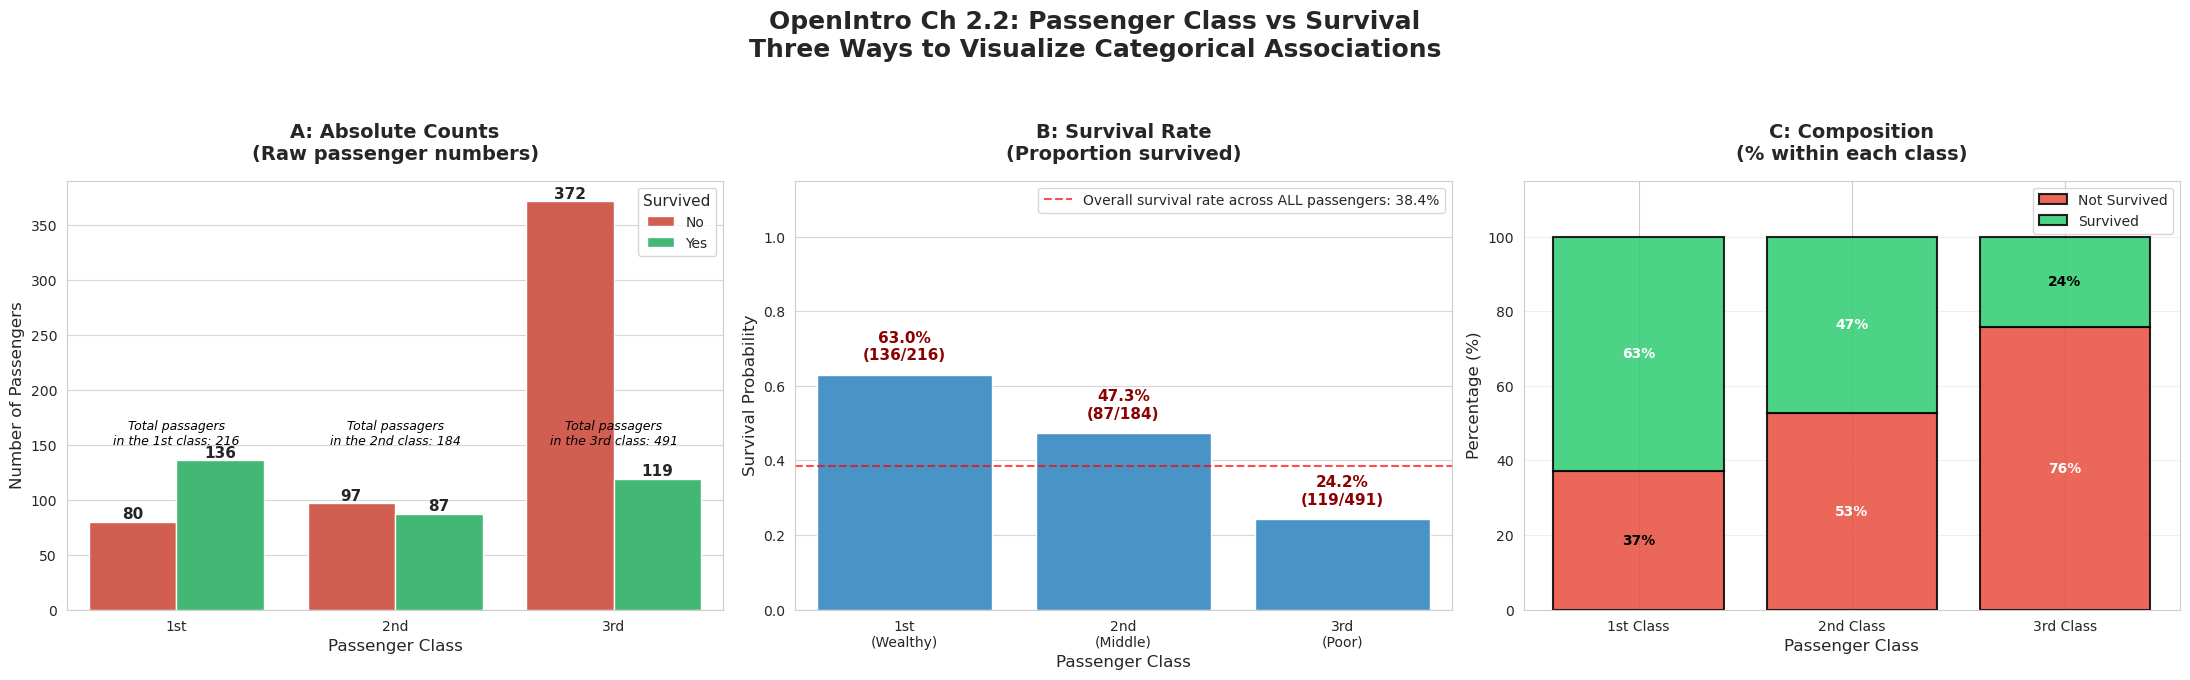


**********************************************************************
Detailed Statistics: pclass vs survived (OpenIntro Ch 2.2)
**********************************************************************
Class        Total      Survived        Not Survived    Survival Rate  
----------------------------------------------------------------------
1st Class    216        136             80                63.0%
2nd Class    184        87              97                47.3%
3rd Class    491        119             372               24.2%
----------------------------------------------------------------------
TOTAL        891        342             549               38.4%

OpenIntro Critical Insight:
  • OBSERVED ASSOCIATION: Higher class → Higher survival rate
  • NOT CAUSATION: This is an OBSERVATIONAL STUDY
  • Confounding variables likely explain the association:
      - Physical: 1st class cabins closer to lifeboats
      - Social: 'Women and children first' applied unevenly by class
     

In [101]:
# OpenIntro Ch 2: Complete Visualization — pclass vs survived (3 chart types)
#chart 1 barplot - person amount vs survived in every class
# df.groupby return a pandas.DataFrame
# df.groupby is like sql -> select pclass, survived,count(1) from dateset group by pclass,survived
df_pclass_survival_number = df.groupby(['pclass', 'survived']).size().reset_index(name='count') # the name of column is count, size() like sql count()
# add a new item survived_label,its values is 'No/Yes'
# finally in the survival_by_class, it includes four column : pclass, survived, count,survied_label.
df_pclass_survival_number['survived_label'] = df_pclass_survival_number['survived'].map({0: 'No', 1: 'Yes'})

# chart 2 barplot - every class survial rate.
# like sql -> select pclass, mean(survived) from dataset group by pclass
df_pclass_survival_rate = df.groupby('pclass')['survived'].mean().reset_index(name='survival_rate') # the name of column is survival_rate.
# add a new column survival_pct, its value is survival_rate *100
df_pclass_survival_rate['survival_pct'] = df_pclass_survival_rate['survival_rate'] * 100

# chart3 bar - crosstab, every bar include percent of dead + percent of survived for every pcalss
"""
pd.crosstab return a pandas.DataFrame, it is a crosstable.
    survived    0    1
    pclass            
    1          80  136
    2          97   87
    3         372  119
"""
df_pclass_suivived_crosstab = pd.crosstab(df['pclass'], df['survived'])


# define canvas with 1 row 3 column
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

#chart 1 barplot - person amount vs survived in every class
sns.barplot(
    data=df_pclass_survival_number,
    x='pclass',
    y='count', # it is the column count of df_pclass_survival_number.
    #hue creates grouped bars within each pclass, hue splits each passenger class bar into two sub-bars:
    #One for survived passengers,the other for did not survive passengers
    #survived_label is likely a categorical column with values like 'Survived' and 'Died'
    hue='survived_label',
    palette=['#E74C3C', '#2ECC71'],  # red=dead, gree= survived.
    order=[1, 2, 3], # pclass[1,2,3]
    ax=axes[0],
    legend=True
)

# add count(person) number.fmt='%d' -> only show integer
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

axes[0].xaxis.set_major_locator(FixedLocator([0, 1, 2]))  #pclass [1,2,3]
axes[0].set_title('A: Absolute Counts\n(Raw passenger numbers)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Passenger Class', fontsize=12)
axes[0].set_ylabel('Number of Passengers', fontsize=12)
axes[0].set_xticklabels(['1st', '2nd', '3rd']) #scale lable
axes[0].legend(title='Survived', fontsize=10, title_fontsize=11)
axes[0].grid(axis='y', alpha=0.8)

# add total persons in every pclass.
for i, pclass in enumerate([1, 2, 3]):
    total = df_pclass_survival_number[df_pclass_survival_number['pclass'] == pclass]['count'].sum() #add all lines
    # value of X-axis = 1, value of y-axis = 150 
    axes[0].text(i, 150, f'Total passagers\nin the {'1st'if pclass==1 else ( '2nd' if pclass==2 else '3rd')} class: {total}', ha='center', fontsize=9, style='italic', color='black')

#chart 2 every class survial rate.
# since x='pclass' already separates bars by passenger class, the hue grouping creates no additional separation, so hue is no useful.
sns.barplot(
    data=df_pclass_survival_rate,
    x='pclass',
    y='survival_rate',
    color='#3498DB', #directly use color, all the bars use the same color.
    order=[1, 2, 3],
    ax=axes[1],
    legend=False
)
# add pourcentage and numer of person
# zip() combines multiple iterables into tuples, pairing elements from each iterable by position.
for i, (pclass, rate) in enumerate(zip(df_pclass_survival_rate['pclass'], df_pclass_survival_rate['survival_rate'])):
    #calculate survived persons for each class.
    count_survived = len(df[(df['pclass'] == pclass) & (df['survived'] == 1)])
    #calculate total persons for each class
    count_total = len(df[df['pclass'] == pclass])
    #calculate rate
    label = f'{rate*100:.1f}%\n({count_survived}/{count_total})'
    axes[1].text(i, rate + 0.04, label, ha='center', fontsize=11, fontweight='bold', color='darkred')

axes[1].xaxis.set_major_locator(FixedLocator([0, 1,2])) 
axes[1].set_title('B: Survival Rate\n(Proportion survived)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Passenger Class', fontsize=12)
axes[1].set_ylabel('Survival Probability', fontsize=12)
axes[1].set_xticklabels(['1st\n(Wealthy)', '2nd\n(Middle)', '3rd\n(Poor)']) # set X-axis sacles
axes[1].set_ylim(0, 1.15) #set Y-axis range.

# adds a horizontal dashed red line at the overall survival rate across all passengers, not just by class.
axes[1].axhline(y=df['survived'].mean(), color='red', linestyle='--', alpha=0.7,
                label=f'Overall survival rate across ALL passengers: {df["survived"].mean()*100:.1f}%')
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.8)

# chart3 bar - crosstab, every bar include percent of dead + percent of survived for every pcalss
#creates a NumPy array of 3 zeros
bottom = np.zeros(3)
colors = ['#E74C3C', '#2ECC71']  # red=dead, green=survived
# execute twice loop, the first time (i=0,survived_val=0), the second time (i=1,survived_val=1)
for i, survived_val in enumerate([0, 1]):
    proportions = []
    for pclass in [1, 2, 3]:
        #.loc to get corsstable row/cell--.loc[pclass]=get row, .loc[pclass,suivived_val] = cell.
        # get total of every row (survived + dead) ->loc[row].sum()
        total = df_pclass_suivived_crosstab.loc[pclass].sum()
        # get cell of cross -> loc[row,0] or [row,1]
        count = df_pclass_suivived_crosstab.loc[pclass, survived_val]
        # add survived rate
        proportions.append(count / total * 100)
    #create three bar with survived rate at bottom ->bar1=(proportion[0],0),bar2=(proportion[1],0),bar3=(proportion[2],0) 
    axes[2].bar([1, 2, 3], proportions, bottom=bottom,
                color=colors[i], label='Not Survived' if survived_val == 0 else 'Survived',
                alpha=0.85, edgecolor='black', linewidth=1.5)
    
    # add percent label.
    for j, (pclass, prop) in enumerate(zip([1, 2, 3], proportions)):
        if prop > 5:
            axes[2].text(pclass, bottom[j] + prop/2, f'{prop:.0f}%', 
                        ha='center', va='center', fontsize=10, fontweight='bold',
                        color='white' if prop > 40 else 'black')
    #np.array + np.array -> bottom[i] = bottom[i] + proportions[i], get the new bottom/get new Y-axis values.
    bottom += np.array(proportions)
"""
# add total persons label
for i, pclass in enumerate([1, 2, 3]):
    total = df_pclass_suivived_crosstab.loc[pclass].sum()
    axes[2].text(pclass, 106, f'n={total}', ha='center', fontsize=10, fontweight='bold')
"""

axes[2].xaxis.set_major_locator(FixedLocator([0, 1,2])) 
axes[2].set_title('C: Composition\n(% within each class)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[2].set_xlabel('Passenger Class', fontsize=12)
axes[2].set_ylabel('Percentage (%)', fontsize=12)
axes[2].set_xticks([1, 2, 3])
axes[2].set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
axes[2].set_ylim(0, 115)
axes[2].legend(loc='upper right', fontsize=10)
axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('OpenIntro Ch 2.2: Passenger Class vs Survival\nThree Ways to Visualize Categorical Associations', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#save charts.
figure_path = '../reports/figures/ch2_pclass_survival_comparison.png'
plt.savefig(figure_path, dpi=300, bbox_inches='tight')
plt.show()

# statistics table OpenIntro Ch 2.2）===
print("\n" + "*"*70)
print("Detailed Statistics: pclass vs survived (OpenIntro Ch 2.2)")
print("*"*70)
print(f"{'Class':<12} {'Total':<10} {'Survived':<15} {'Not Survived':<15} {'Survival Rate':<15}")
print("-"*70)

for pclass in [1, 2, 3]:
    class_name = ['1st Class', '2nd Class', '3rd Class'][pclass-1]
    total = len(df[df['pclass'] == pclass])
    survived = len(df[(df['pclass'] == pclass) & (df['survived'] == 1)])
    not_survived = total - survived
    rate = survived / total * 100
    
    print(f"{class_name:<12} {total:<10} {survived:<15} {not_survived:<15} {rate:>6.1f}%")

print("-"*70)
print(f"{'TOTAL':<12} {len(df):<10} {df['survived'].sum():<15} {(len(df)-df['survived'].sum()):<15} {df['survived'].mean()*100:>6.1f}%")

print("\nOpenIntro Critical Insight:")
print("  • OBSERVED ASSOCIATION: Higher class → Higher survival rate")
print("  • NOT CAUSATION: This is an OBSERVATIONAL STUDY")
print("  • Confounding variables likely explain the association:")
print("      - Physical: 1st class cabins closer to lifeboats")
print("      - Social: 'Women and children first' applied unevenly by class")
print("      - Temporal: 3rd class passengers locked below decks initially")
print("\nGolden Rule (OpenIntro Ch 1.6):")
print("   'Association ≠ Causation in observational studies'")


**********************************************************************
Step 3: Outlier Detection (IQR Method) + Distribution Shape
**********************************************************************


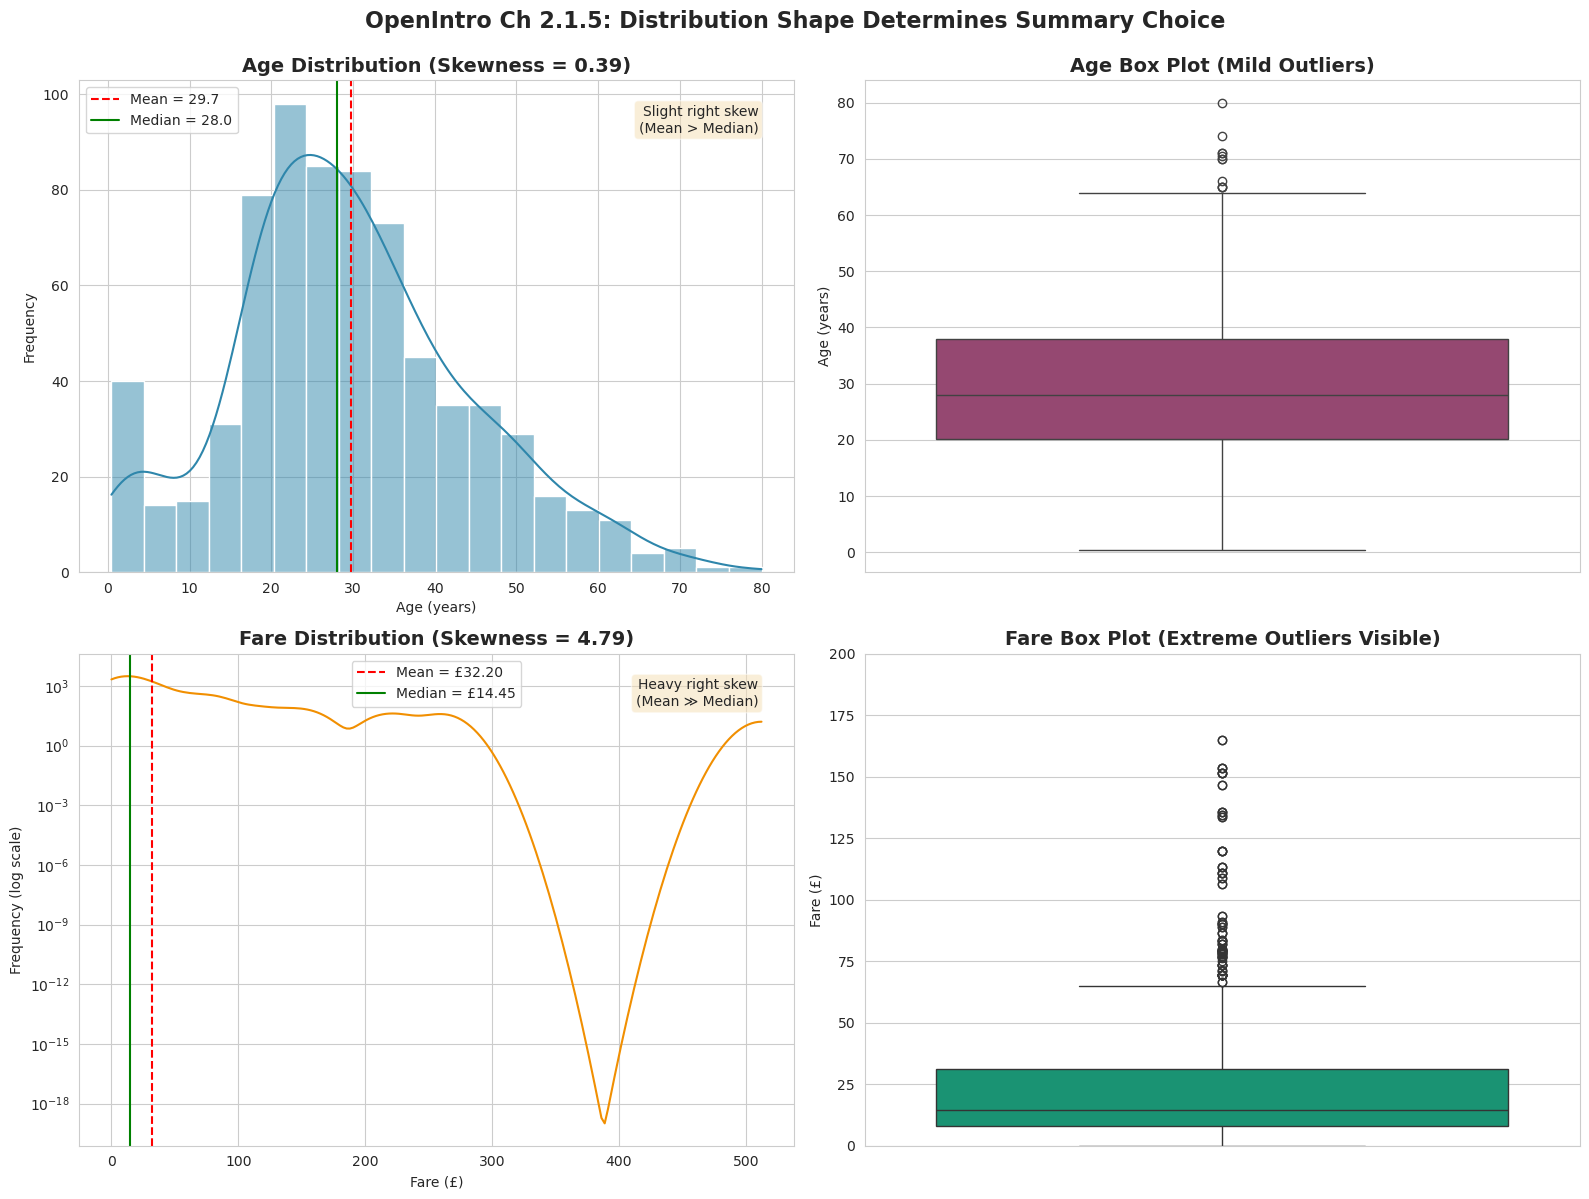


Outlier Detection Using IQR Method (OpenIntro Ch 2.1.5):
   Rule: Outlier if value < Q₁ - 1.5×IQR OR value > Q₃ + 1.5×IQR

AGE:
  • Q₁ = 20.12, Q₃ = 38.00, IQR = 17.88
  • Lower bound = -6.69, Upper bound = 64.81
  • Outliers detected: 11 passengers (1.2%)

FARE:
  • Q₁ = 7.91, Q₃ = 31.00, IQR = 23.09
  • Lower bound = -26.72, Upper bound = 65.63
  • Outliers detected: 116 passengers (13.0%)
  • Top 3 outliers:
      - Passenger 258: fare = £512.33 (pclass=1)
      - Passenger 737: fare = £512.33 (pclass=1)
      - Passenger 679: fare = £512.33 (pclass=1)

Critical Insight (OpenIntro Ch 2.1.6):
  • Outliers are NOT necessarily errors — they reflect real phenomena
  • Fare outliers (£512) = wealthy first-class passengers (valid data)
  • NEVER remove outliers without investigation — may hide important patterns


In [111]:
# OpenIntro Ch 2.1.5: Outlier Detection (IQR Method) + Distribution Shape
print("*"*70)
print("Step 3: Outlier Detection (IQR Method) + Distribution Shape")
print("*"*70)

#define a canvas with 2 row * 2 columns.
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#chart 1 histogram - Age -- continuous
sns.histplot(
    df['age'].dropna(), #drop value null(n/a)
    bins=20, #set fixed number of bins, a bin = 5 years.
    kde=True, #kde=True, it shows the Kernel Density Estimate (KDE) curve(KDE 曲线)
    ax=axes[0,0], 
    color='#2E86AB'
)
#show mean(age)--for vertical line = axvline(),for Horizontal Line = axhline()
#here label value--Mean show in the area legend.
axes[0,0].axvline(df['age'].mean(), color='red', linestyle='--', label=f"Mean = {df['age'].mean():.1f}")
#show median(age)--for vertical line = axvline(),for Horizontal Line = axhline()
#here label value--median show in the area legend.
axes[0,0].axvline(df['age'].median(), color='green', linestyle='-', label=f"Median = {df['age'].median():.1f}")
#Skewness=偏度 
axes[0,0].set_title(f'Age Distribution (Skewness = {df["age"].skew():.2f})', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age (years)')
axes[0,0].set_ylabel('Frequency')
#show value --- mean and median.
axes[0,0].legend()
axes[0,0].text(0.95, 0.95, 'Slight right skew\n(Mean > Median)', 
               transform=axes[0,0].transAxes, ha='right', va='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


# (b) Age box plot (repeated for comparison)
sns.boxplot(
    data=df, 
    y='age', 
    ax=axes[0,1], 
    color='#A23B72'
)
axes[0,1].set_title('Age Box Plot (Mild Outliers)', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Age (years)')

# (c) Fare histogram (log scale for visibility)
sns.histplot(
    df['fare'].dropna(), 
    bins=3, 
    kde=True, 
    ax=axes[1,0], 
    color='#F18F01', 
    log_scale=(False, True)  # x=normal-fare, y=log(y)-personnes
)
#show mean
axes[1,0].axvline(df['fare'].mean(), color='red', linestyle='--', label=f"Mean = £{df['fare'].mean():.2f}")
#show median
axes[1,0].axvline(df['fare'].median(), color='green', linestyle='-', label=f"Median = £{df['fare'].median():.2f}")
axes[1,0].set_title(f'Fare Distribution (Skewness = {df["fare"].skew():.2f})', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Fare (£)')
axes[1,0].set_ylabel('Frequency (log scale)')
axes[1,0].legend()
axes[1,0].text(0.95, 0.95, 'Heavy right skew\n(Mean ≫ Median)', 
               transform=axes[1,0].transAxes, ha='right', va='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# (d) Fare box plot (showing extreme outliers)
sns.boxplot(
    data=df, 
    y='fare', 
    ax=axes[1,1], 
    color='#06A77D'
)
axes[1,1].set_title('Fare Box Plot (Extreme Outliers Visible)', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Fare (£)')
axes[1,1].set_ylim(0, 200)  # Show outliers up to £200

plt.suptitle('OpenIntro Ch 2.1.5: Distribution Shape Determines Summary Choice', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()

#output_path = os.path.join(os.getcwd(), 'reports', 'figures', 'ch2_distributions.png')
#plt.savefig(output_path, dpi=300, bbox_inches='tight')
#print(f"\nSUCCESS: Distribution plots saved to {output_path}")
plt.show()

# IQR-outlier value
print("\nOutlier Detection Using IQR Method (OpenIntro Ch 2.1.5):")
print("   Rule: Outlier if value < Q₁ - 1.5×IQR OR value > Q₃ + 1.5×IQR\n")

for var in ['age', 'fare']:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    n_outliers = len(outliers)
    pct_outliers = n_outliers / len(df) * 100
    
    print(f"{var.upper()}:")
    print(f"  • Q₁ = {q1:.2f}, Q₃ = {q3:.2f}, IQR = {iqr:.2f}")
    print(f"  • Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")
    print(f"  • Outliers detected: {n_outliers} passengers ({pct_outliers:.1f}%)")
    
    if n_outliers > 0 and var == 'fare':
        extreme = outliers.sort_values(var, ascending=False).head(3)
        print(f"  • Top 3 outliers:")
        for idx, row in extreme.iterrows():
            print(f"      - Passenger {idx}: fare = £{row[var]:.2f} (pclass={row['pclass']})")
    
    print()

print("Critical Insight (OpenIntro Ch 2.1.6):")
print("  • Outliers are NOT necessarily errors — they reflect real phenomena")
print("  • Fare outliers (£512) = wealthy first-class passengers (valid data)")
print("  • NEVER remove outliers without investigation — may hide important patterns")

**********************************************************************
Step 4: Categorical Summaries — Frequencies & Proportions (NOT Means)
**********************************************************************
Critical Clarification:
   • For BINARY variables (survived=0/1): mean = proportion (mathematically equivalent)
   • For NOMINAL variables (sex): NEVER use mean — use frequencies/proportions only
**********************************************************************
Categorical Variable Summaries:
Rule: Use FREQUENCIES/PROPORTIONS (not mean/median)

SEX:
  Value           Frequency    Proportion  
  ---------------------------------------------
  male            577          64.8%
  female          314          35.2%

PCLASS:
  Value           Frequency    Proportion  
  ---------------------------------------------
  3               491          55.1%
  1               216          24.2%
  2               184          20.7%

EMBARKED:
  Value           Frequency    Proportion 

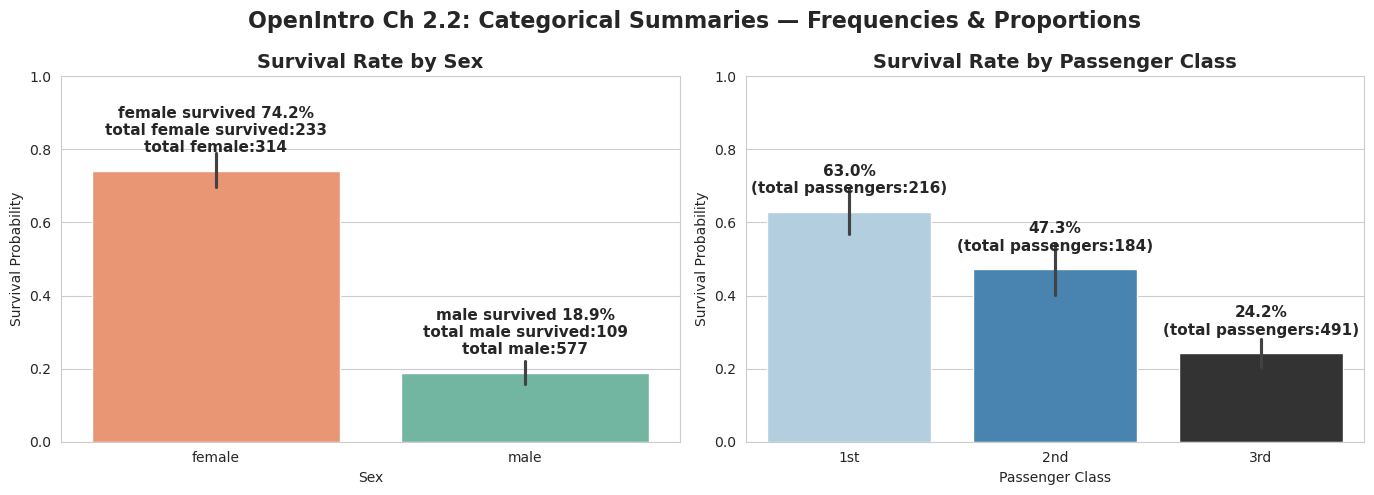

In [183]:
# OpenIntro Ch 2.2: Summarizing Categorical Variables (CONCEPTUALLY PRECISE)
print("*"*70)
print("Step 4: Categorical Summaries — Frequencies & Proportions (NOT Means)")
print("*"*70)
print("Critical Clarification:")
print("   • For BINARY variables (survived=0/1): mean = proportion (mathematically equivalent)")
print("   • For NOMINAL variables (sex): NEVER use mean — use frequencies/proportions only")
print("*"*70)
#categorical type
categorical_vars = ['sex', 'pclass', 'embarked', 'survived']

print("Categorical Variable Summaries:")
print("Rule: Use FREQUENCIES/PROPORTIONS (not mean/median)\n")

for var in categorical_vars:
    #caculate frequencies for every item in categorical_vars.
    # freq = pd.Series({'male': 577, 'female': 314})
    freq = df[var].value_counts()
    #caculate proportions for every item in categorical_vars, for normalize=True, it calculates proportions. 
    #prop = pd.Series({'male': 64.8, '35.2': 314})
    prop = df[var].value_counts(normalize=True) * 100
    print(f"{var.upper()}:")
    #format for title
    print(f"  {'Value':<15} {'Frequency':<12} {'Proportion':<12}")
    print("  " + "-"*45)
    # freq.index = Index(['male', 'female'])
    # the first loop: val = 'male',
    # the seconde loop:val = 'female'
    # freq[val]->freq['male']=577 or freq['female']=314
    # prop[val]->prop['male']=64.8 or prop['female']=35.2
    for val in freq.index:
        label = str(val).replace('0', 'No').replace('1', 'Yes') if var == 'survived' else str(val)
        print(f"  {label:<15} {freq[val]:<12} {prop[val]:.1f}%")
    print()
    
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (a) Survival by sex
sns.barplot(
    data=df,
    x='sex',
    y='survived',
    hue='sex',
    palette='Set2',
    order=['female', 'male'],
    ax=axes[0],
    legend=False
)
axes[0].set_title('Survival Rate by Sex', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Survival Probability')
axes[0].set_xlabel('Sex')
axes[0].set_ylim(0, 1)
#add label
#total_survived = df[df['survived']==1]['survived'].sum()
#print(total_survived)
for i, sex in enumerate(['female', 'male']):
    total_servived_sex=df.query("survived == 1 and sex ==@sex")['survived'].sum()    
    rate = df[df['sex'] == sex]['survived'].mean()
    count = (df['sex'] == sex).sum()
    axes[0].text(i, rate + 0.05, f'{sex} survived { rate:.1%}\ntotal {sex} survived:{total_servived_sex}\ntotal {sex}:{count}', 
                ha='center', fontsize=11, fontweight='bold')

# (b) Survival by pclass
sns.barplot(
    data=df,
    x='pclass',
    y='survived',
    hue='pclass',
    palette='Blues_d',
    order=[1, 2, 3],
    ax=axes[1],
    legend=False
)
axes[1].xaxis.set_major_locator(FixedLocator([0, 1,2])) 
axes[1].set_title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Probability')
axes[1].set_xlabel('Passenger Class')
axes[1].set_xticklabels(['1st', '2nd', '3rd'])
axes[1].set_ylim(0, 1)

#add label
for i, pclass in enumerate([1, 2, 3]):
    rate = df[df['pclass'] == pclass]['survived'].mean()
    count = (df['pclass'] == pclass).sum()
    axes[1].text(i, rate + 0.05, f'{rate:.1%}\n(total passengers:{count})', 
                ha='center', fontsize=11, fontweight='bold')

plt.suptitle('OpenIntro Ch 2.2: Categorical Summaries — Frequencies & Proportions', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

**********************************************************************
Step 4: Categorical Summaries — Frequencies & Proportions (NOT Means)
**********************************************************************
Critical Clarification:
   • For BINARY variables (survived=0/1): mean = proportion (mathematically equivalent)
   • For NOMINAL variables (sex): NEVER use mean — use frequencies/proportions only
**********************************************************************

 Categorical Variable Summaries:
   Rule: Use FREQUENCIES/PROPORTIONS (never mean for nominal variables)

SEX:
  Value           Frequency    Proportion  
  ---------------------------------------------
  male            577          64.8%
  female          314          35.2%

PCLASS:
  Value           Frequency    Proportion  
  ---------------------------------------------
  3               491          55.1%
  1               216          24.2%
  2               184          20.7%

EMBARKED:
  Value           Fr

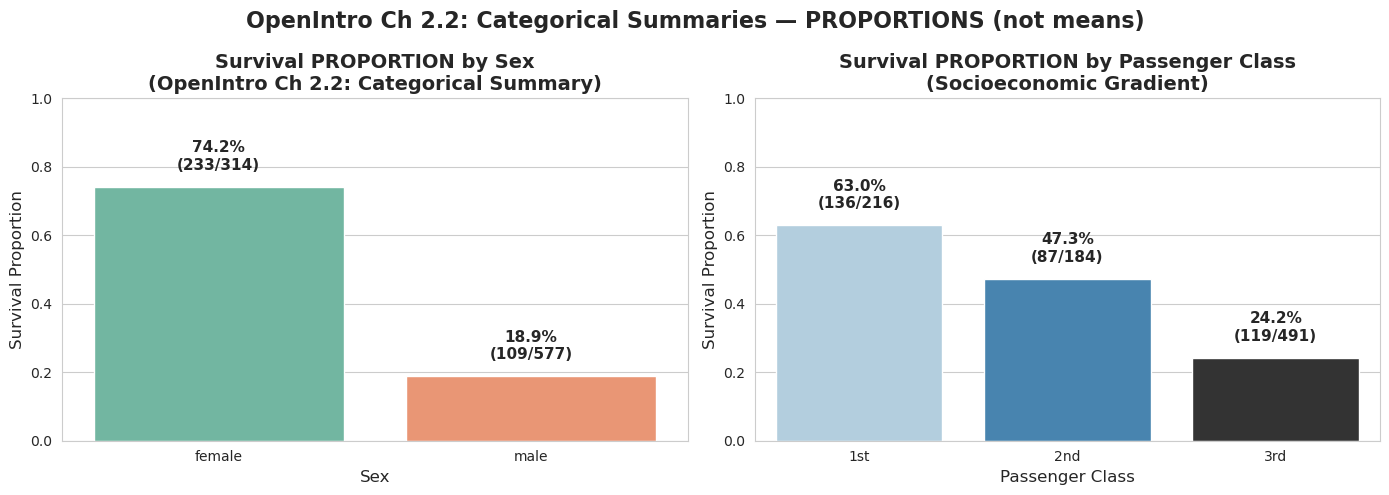


Critical Demonstration: Why NEVER use mean() for nominal variables

WRONG: Attempting 'mean(sex)'
   Code: df['sex'].mean()
   Error: TypeError: Could not convert string 'malefemalefemalefemalemalemalemalemalefemalefemalefemalefemalemalemalefemalefemalemalemalefemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalefemalefemalemalemalemalemalemalefemalefemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalemalefemalefemalemalemalefemalemalefemalemalemalefemalemalemalemalemalefemalemalefemalemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalemalefemalemalemalefemalemalefemalemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalefemalefemalemalemalemalemalefemalemalemalemalema

In [182]:
# OpenIntro Ch 2.2: Summarizing Categorical Variables (CONCEPTUALLY PRECISE)
print("*"*70)
print("Step 4: Categorical Summaries — Frequencies & Proportions (NOT Means)")
print("*"*70)
print("Critical Clarification:")
print("   • For BINARY variables (survived=0/1): mean = proportion (mathematically equivalent)")
print("   • For NOMINAL variables (sex): NEVER use mean — use frequencies/proportions only")
print("*"*70)

categorical_vars = ['sex', 'pclass', 'embarked']

print("\n Categorical Variable Summaries:")
print("   Rule: Use FREQUENCIES/PROPORTIONS (never mean for nominal variables)\n")

for var in categorical_vars:
    #frequency and proportion
    freq = df[var].value_counts()
    prop = df[var].value_counts(normalize=True) * 100
    
    print(f"{var.upper()}:")
    print(f"  {'Value':<15} {'Frequency':<12} {'Proportion':<12}")
    print("  " + "-"*45)
    for val in freq.index:
        print(f"  {str(val):<15} {freq[val]:<12} {prop[val]:.1f}%")
    print()


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (a) Survival PROPORTION by sex (NOT "mean")
"""
survival_prop_sex like this:
    sex     survival_proportion
0  female             0.742038
1    male             0.188908
"""
survival_prop_sex = df.groupby('sex')['survived'].mean().reset_index()
survival_prop_sex.columns = ['sex', 'survival_proportion']

sns.barplot(
    data=survival_prop_sex,
    x='sex',
    y='survival_proportion',
    hue='sex',
    palette='Set2',
    order=['female', 'male'],
    ax=axes[0],
    legend=False
)
axes[0].set_title('Survival PROPORTION by Sex\n(OpenIntro Ch 2.2: Categorical Summary)', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Survival Proportion', fontsize=12)
axes[0].set_xlabel('Sex', fontsize=12)
axes[0].set_ylim(0, 1)

# 添加比例标签 + 频数
for i, sex in enumerate(['female', 'male']):
    prop = df[df['sex'] == sex]['survived'].mean()
    count = (df['sex'] == sex).sum()
    survived_count = (df[df['sex'] == sex]['survived'] == 1).sum()
    axes[0].text(i, prop + 0.05, f'{prop:.1%}\n({survived_count}/{count})', 
                ha='center', fontsize=11, fontweight='bold')

# (b) Survival PROPORTION by pclass (NOT "mean")
"""
survival_prop_class like this:
   pclass  survival_proportion
0       1             0.629630
1       2             0.472826
2       3             0.242363
"""
survival_prop_class = df.groupby('pclass')['survived'].mean().reset_index()
survival_prop_class.columns = ['pclass', 'survival_proportion']


sns.barplot(
    data=survival_prop_class,
    x='pclass',
    y='survival_proportion',
    hue='pclass',
    palette='Blues_d',
    order=[1, 2, 3],
    ax=axes[1],
    legend=False
)

axes[1].xaxis.set_major_locator(FixedLocator([0, 1,2])) 
axes[1].set_title('Survival PROPORTION by Passenger Class\n(Socioeconomic Gradient)', 
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Proportion', fontsize=12)
axes[1].set_xlabel('Passenger Class', fontsize=12)
axes[1].set_xticklabels(['1st', '2nd', '3rd'])
axes[1].set_ylim(0, 1)

# 添加比例标签 + 频数
for i, pclass in enumerate([1, 2, 3]):
    prop = df[df['pclass'] == pclass]['survived'].mean()
    count = (df['pclass'] == pclass).sum()
    survived_count = (df[df['pclass'] == pclass]['survived'] == 1).sum()
    axes[1].text(i, prop + 0.05, f'{prop:.1%}\n({survived_count}/{count})', 
                ha='center', fontsize=11, fontweight='bold')

plt.suptitle('OpenIntro Ch 2.2: Categorical Summaries — PROPORTIONS (not means)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# 保存
#output_path = os.path.join(os.getcwd(), 'reports', 'figures', 'ch2_categorical_proportions.png')
#plt.savefig(output_path, dpi=300, bbox_inches='tight')
#print(f"\nSUCCESS: Proportion charts saved to {output_path}")
plt.show()

# === 对比：为什么不能对 nominal 变量用 mean ===
print("\n" + "="*70)
print("Critical Demonstration: Why NEVER use mean() for nominal variables")
print("="*70)

# 错误示例：尝试对 sex 计算 "mean"
print("\nWRONG: Attempting 'mean(sex)'")
print("   Code: df['sex'].mean()")
try:
    result = df['sex'].mean()
    print(f"   Result: {result} (meaningless!)")
except Exception as e:
    print(f"   Error: {type(e).__name__}: {e}")

print("\nCORRECT: Use value_counts() for nominal variables")
print("   Code: df['sex'].value_counts()")
print(df['sex'].value_counts())

print("\nOpenIntro Principle:")
print("   'For categorical variables, report frequencies or proportions —")
print("    NEVER report means unless the variable is binary (0/1)'")